## Libraries
    
<font size=3 color="black" style="font-family:TimesNewRoman">
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score
%matplotlib inline

from sklearn.svm import LinearSVC

from collections import Counter
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix, classification_report


#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix


from warnings import filterwarnings
filterwarnings("ignore")



## Reading Data

In [2]:
data_path='Bank_Personal_Loan_Modelling.csv'
df=pd.read_csv(data_path)
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the columns are numerical here. Personal loan is target variable. Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

## Data Preprocessing

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#Minimum value of experience is negative
df['Experience'][df['Experience'] < 0] = df['Experience'].mean()
#Negative value replaced with mean
df['Experience'].value_counts()

32.0000    154
20.0000    148
9.0000     147
5.0000     146
23.0000    144
35.0000    143
25.0000    142
28.0000    138
18.0000    137
19.0000    135
26.0000    134
24.0000    131
3.0000     129
16.0000    127
14.0000    127
30.0000    126
17.0000    125
34.0000    125
27.0000    125
22.0000    124
29.0000    124
7.0000     121
6.0000     119
15.0000    119
8.0000     119
10.0000    118
13.0000    117
33.0000    117
11.0000    116
37.0000    116
36.0000    114
21.0000    113
4.0000     113
31.0000    104
12.0000    102
38.0000     88
2.0000      85
39.0000     85
1.0000      74
0.0000      66
40.0000     57
20.1046     52
41.0000     43
42.0000      8
43.0000      3
Name: Experience, dtype: int64

In [6]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009344,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977008,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009344,0.977008,1.000000,-0.049054,-0.028488,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.017695,-0.055269,-0.049054,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028488,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045488,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048708,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018097,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013378,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014045,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


OBSERVATION



* 'Age' and 'Experience' are correlated with each other.
* 'Income and 'CCAvg' correlated with each other.
* CD Account has a correlation with 'CreditCard', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
* 'Personal Loan' has correlation with 'Income', ann 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
* 'Mortgage' has moderate correlation with 'Income
* 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.



In [7]:
#Id and Zipcode are not affecting personal loans
df.drop(['ID', 'ZIP Code'], axis = 1, inplace=True) 
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [9]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

oneHotCols=['Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

## Splitting

In [10]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1,stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

## Recall vs Accuracy
Model can make wrong predictions as:
Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)
Which case is more important?


The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.
How to reduce losses?i.e need to reduce False Negatives ?
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.



We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [12]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [13]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    print("Model performance")
    print("Accuracy : Train: ", round(accuracy_score(y_train_pass,pred_train),3) , " Test: ",round(accuracy_score(y_test_pass,pred_test),3))
    print("Recall   : Train: ", round(recall_score(y_train_pass,pred_train),3) , " Test: ",round(recall_score(y_test_pass,pred_test),3))
    print("Precision: Train: ", round(precision_score(y_train_pass,pred_train),3) , " Test: ",round(precision_score(y_test_pass,pred_test),3))
    print("F1       : Train: ", round(f1_score(y_train_pass,pred_train),3) , " Test: ",round(f1_score(y_test_pass,pred_test),3))
    print("ROC.     : Train: ", round(roc_auc_score(y_train_pass,pred_train),3)," Test: ",round(roc_auc_score(y_test_pass,pred_test),3))

    make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
    make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   

## Logistic Regression

Model performance
Accuracy : Train:  0.961  Test:  0.957
Recall   : Train:  0.685  Test:  0.646
Precision: Train:  0.881  Test:  0.869
F1       : Train:  0.771  Test:  0.741
ROC.     : Train:  0.837  Test:  0.818


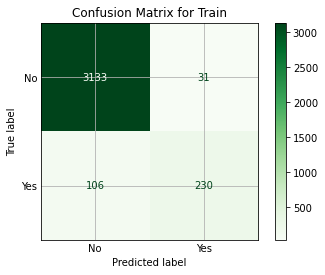

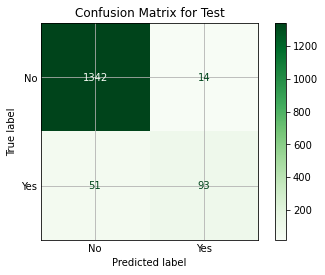

In [14]:
lr = LogisticRegression(solver='liblinear')
model  = lr.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Support Vector Machine

Model performance
Accuracy : Train:  0.964  Test:  0.959
Recall   : Train:  0.682  Test:  0.66
Precision: Train:  0.92  Test:  0.888
F1       : Train:  0.783  Test:  0.757
ROC.     : Train:  0.838  Test:  0.825


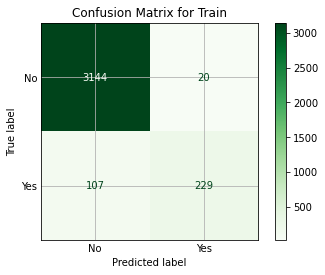

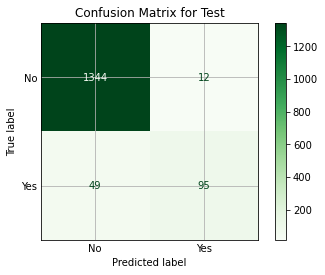

In [15]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(svclassifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## K MEANS

Model performance
Accuracy : Train:  0.856  Test:  0.868
Recall   : Train:  0.857  Test:  0.847
Precision: Train:  0.387  Test:  0.409
F1       : Train:  0.533  Test:  0.552
ROC.     : Train:  0.856  Test:  0.859


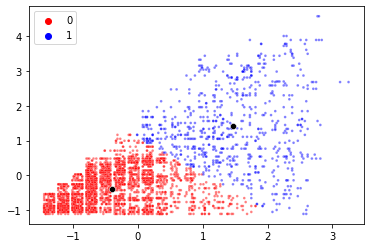

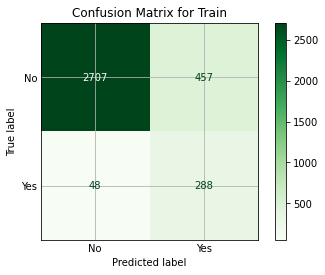

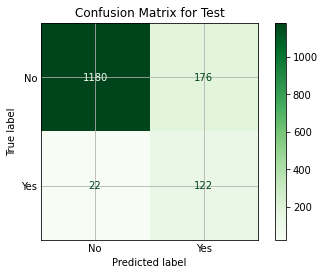

In [16]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
x_d = X_train_scaled[:, [2, 4]]
x_d1 = X_test_scaled[:, [2, 4]]
km.fit(x_d)
y_predict = km.fit_predict(x_d)
sns.scatterplot(x_d[:,0], x_d[:,1], hue=km.labels_, palette=['red', 'blue'], alpha=0.5, s=7)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c=['black'])

scores_Sklearn = get_metrics_score(km,x_d,x_d1,y_train,y_test)


## K Nearest NeighBours

Model performance
Accuracy : Train:  0.98  Test:  0.958
Recall   : Train:  0.807  Test:  0.604
Precision: Train:  0.985  Test:  0.935
F1       : Train:  0.887  Test:  0.734
ROC.     : Train:  0.903  Test:  0.8


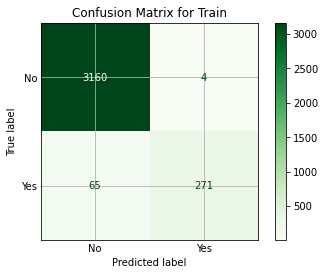

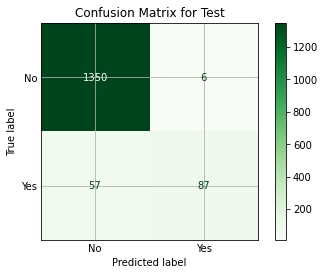

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Naive Bayes

Model performance
Accuracy : Train:  0.98  Test:  0.958
Recall   : Train:  0.807  Test:  0.604
Precision: Train:  0.985  Test:  0.935
F1       : Train:  0.887  Test:  0.734
ROC.     : Train:  0.903  Test:  0.8


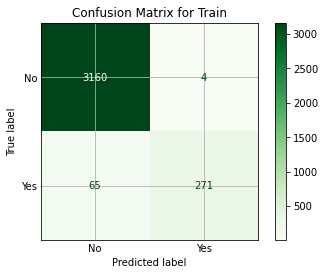

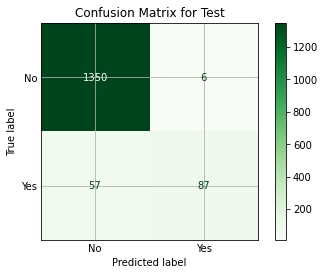

In [18]:
n_bayes = GaussianNB()
n_bayes.fit(X_train_scaled_df, y_train)

scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Perceptron

Model performance
Accuracy : Train:  0.922  Test:  0.919
Recall   : Train:  0.798  Test:  0.757
Precision: Train:  0.565  Test:  0.559
F1       : Train:  0.662  Test:  0.643
ROC.     : Train:  0.866  Test:  0.847


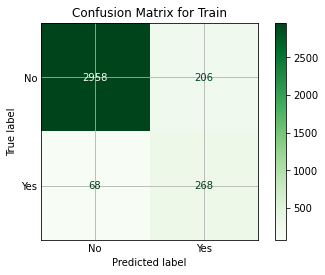

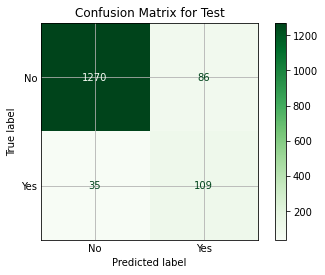

In [19]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train_scaled_df,y_train)
 
# Let's check model performances for this model
scores_Sklearn = get_metrics_score(clf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## MLP CLASSIFIER

Model performance
Accuracy : Train:  0.997  Test:  0.976
Recall   : Train:  0.976  Test:  0.806
Precision: Train:  0.994  Test:  0.935
F1       : Train:  0.985  Test:  0.866
ROC.     : Train:  0.988  Test:  0.9


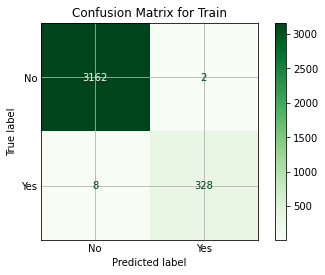

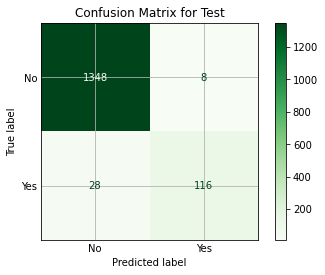

In [20]:
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(MLPclf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)


## OVERSAMPLING

In [21]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=1)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

## Splitting

In [22]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.20, random_state = 1,stratify=y_resampled)

In [23]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

## Logistic Regression

Model performance
Accuracy : Train:  0.897  Test:  0.908
Recall   : Train:  0.933  Test:  0.939
Precision: Train:  0.871  Test:  0.884
F1       : Train:  0.901  Test:  0.911
ROC.     : Train:  0.897  Test:  0.908


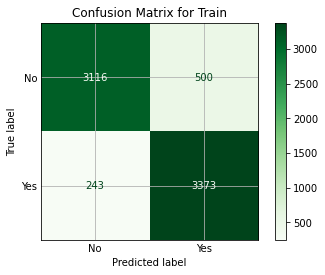

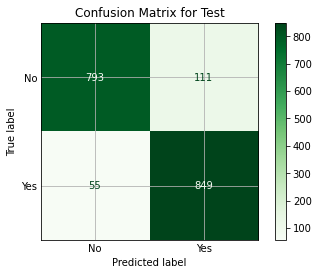

In [24]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Support Vector Machine

Model performance
Accuracy : Train:  0.898  Test:  0.911
Recall   : Train:  0.933  Test:  0.947
Precision: Train:  0.873  Test:  0.883
F1       : Train:  0.902  Test:  0.914
ROC.     : Train:  0.898  Test:  0.911


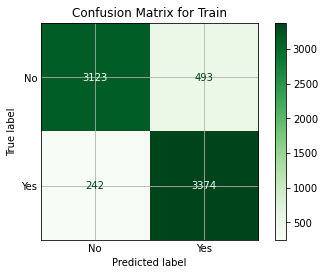

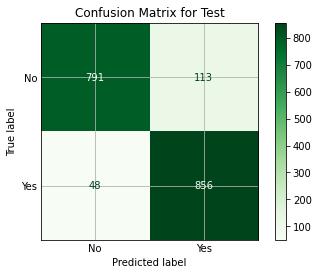

In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(svclassifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## K MEANS

Model performance
Accuracy : Train:  0.146  Test:  0.133
Recall   : Train:  0.162  Test:  0.149
Precision: Train:  0.157  Test:  0.145
F1       : Train:  0.159  Test:  0.147
ROC.     : Train:  0.146  Test:  0.133


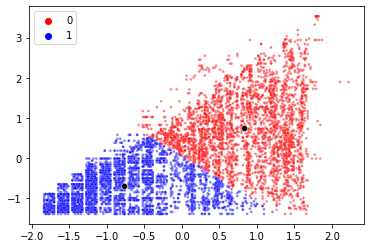

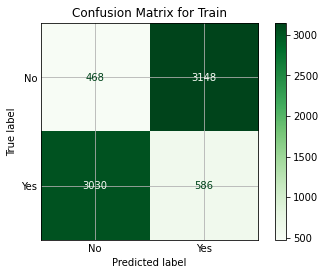

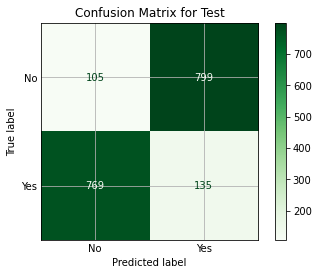

In [26]:
from sklearn.cluster import KMeans

x_d = X_train_scaled[:, [2, 4]]
x_d1 = X_test_scaled[:, [2, 4]]
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

km.fit(x_d)
y_predict = km.fit_predict(x_d)
sns.scatterplot(x_d[:,0], x_d[:,1], hue=km.labels_, palette=['red', 'blue'], alpha=0.5, s=7)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c=['black'])

scores_Sklearn = get_metrics_score(km,x_d,x_d1,y_train,y_test)

## K Nearest NeighBours

Model performance
Accuracy : Train:  0.969  Test:  0.936
Recall   : Train:  0.979  Test:  0.947
Precision: Train:  0.959  Test:  0.926
F1       : Train:  0.969  Test:  0.937
ROC.     : Train:  0.969  Test:  0.936


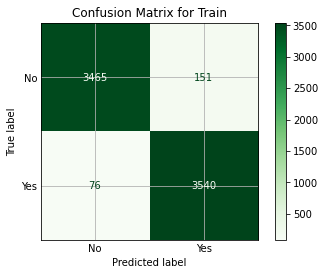

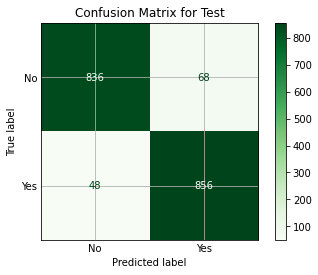

In [27]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Naive Bayes

Model performance
Accuracy : Train:  0.969  Test:  0.936
Recall   : Train:  0.979  Test:  0.947
Precision: Train:  0.959  Test:  0.926
F1       : Train:  0.969  Test:  0.937
ROC.     : Train:  0.969  Test:  0.936


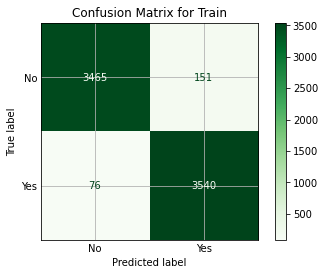

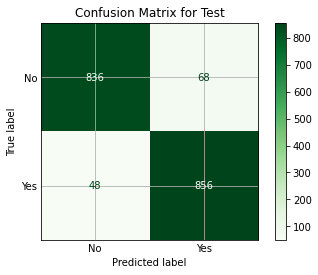

In [28]:
n_bayes = GaussianNB()
n_bayes.fit(X_train_scaled_df, y_train)

scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Perceptron

Model performance
Accuracy : Train:  0.851  Test:  0.86
Recall   : Train:  0.873  Test:  0.881
Precision: Train:  0.836  Test:  0.846
F1       : Train:  0.854  Test:  0.863
ROC.     : Train:  0.851  Test:  0.86


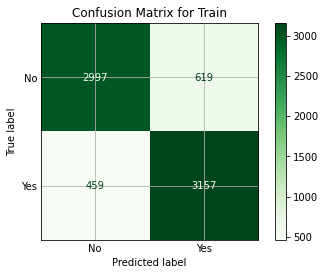

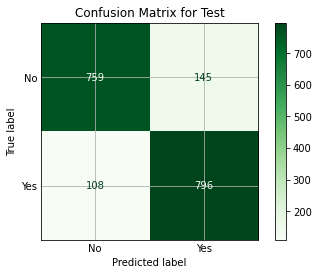

In [29]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(clf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## MLP CLASSIFIER

Model performance
Accuracy : Train:  0.956  Test:  0.935
Recall   : Train:  0.985  Test:  0.966
Precision: Train:  0.931  Test:  0.91
F1       : Train:  0.957  Test:  0.937
ROC.     : Train:  0.956  Test:  0.935


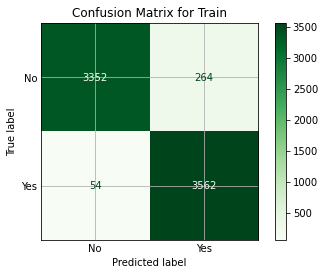

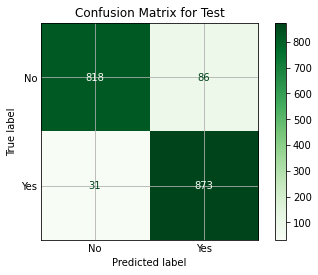

In [30]:
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled_df,y_train)
 
# Let's check model performances for this model
scores_Sklearn = get_metrics_score(MLPclf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)


MLP gave high accuracy among all other classification but as recall and precision is low in all the methods, Therefore accuracy here is misleading.

In [31]:
#Data imbalance
l_count = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
l_count.columns =["Labels","Personal Loan"]
l_count


,Labels,Personal Loan
0,0,4520
1,1,480


The number of personal loans getting accepted is very less, so we need to either oversample the minority points or undersample the majority points.

## UNDERSAMPLING

In [32]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

## Splitting

In [33]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.30, random_state = 1,stratify=y_resampled)

In [34]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

## Logistic Regression

Model performance
Accuracy : Train:  0.908  Test:  0.91
Recall   : Train:  0.905  Test:  0.917
Precision: Train:  0.91  Test:  0.904
F1       : Train:  0.907  Test:  0.91
ROC.     : Train:  0.908  Test:  0.91


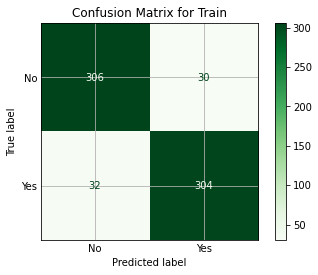

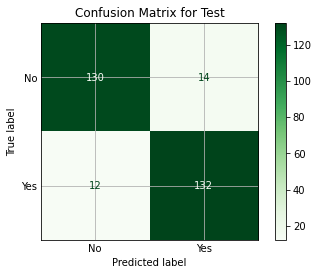

In [35]:
lr = LogisticRegression(solver='newton-cg')
model  = lr.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Support Vector Machine

Model performance
Accuracy : Train:  0.912  Test:  0.91
Recall   : Train:  0.911  Test:  0.917
Precision: Train:  0.913  Test:  0.904
F1       : Train:  0.912  Test:  0.91
ROC.     : Train:  0.912  Test:  0.91


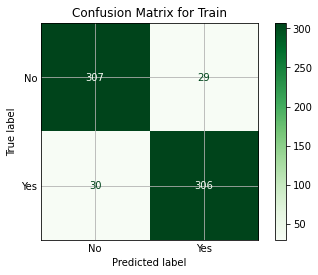

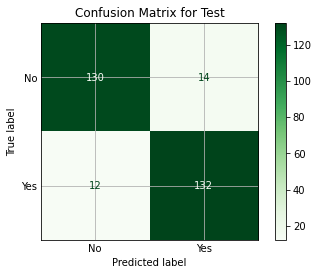

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(svclassifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## K MEANS

Model performance
Accuracy : Train:  0.841  Test:  0.858
Recall   : Train:  0.804  Test:  0.826
Precision: Train:  0.868  Test:  0.881
F1       : Train:  0.835  Test:  0.853
ROC.     : Train:  0.841  Test:  0.858


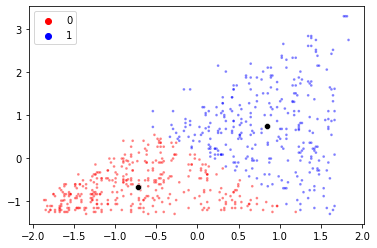

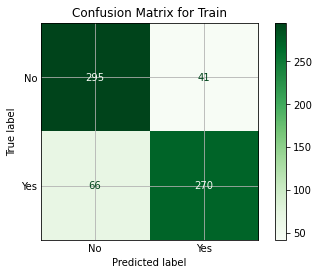

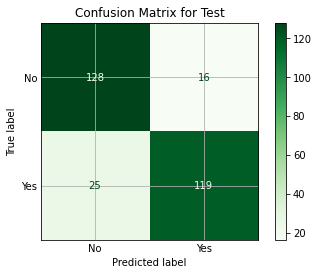

In [37]:
from sklearn.cluster import KMeans

x_d = X_train_scaled[:, [2, 4]]
x_d1 = X_test_scaled[:, [2, 4]]
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

km.fit(x_d)
y_predict = km.fit_predict(x_d)
sns.scatterplot(x_d[:,0], x_d[:,1], hue=km.labels_, palette=['red', 'blue'], alpha=0.5, s=7)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c=['black'])

scores_Sklearn = get_metrics_score(km,x_d,x_d1,y_train,y_test)

## K Nearest NeighBours

Model performance
Accuracy : Train:  0.948  Test:  0.91
Recall   : Train:  0.946  Test:  0.903
Precision: Train:  0.949  Test:  0.915
F1       : Train:  0.948  Test:  0.909
ROC.     : Train:  0.948  Test:  0.91


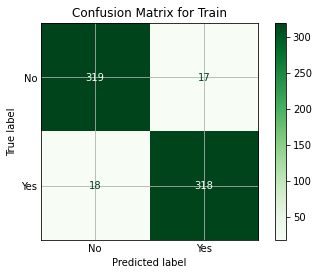

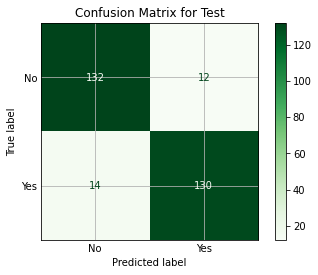

In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Naive Bayes 

Model performance
Accuracy : Train:  0.948  Test:  0.91
Recall   : Train:  0.946  Test:  0.903
Precision: Train:  0.949  Test:  0.915
F1       : Train:  0.948  Test:  0.909
ROC.     : Train:  0.948  Test:  0.91


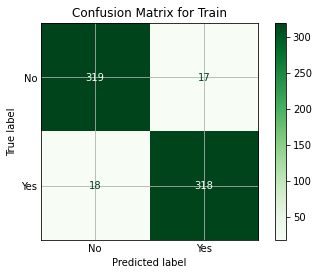

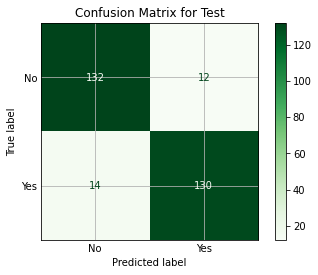

In [39]:
n_bayes = GaussianNB()
n_bayes.fit(X_train_scaled_df, y_train)

scores_Sklearn = get_metrics_score(neigh,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## Perceptron

Model performance
Accuracy : Train:  0.89  Test:  0.875
Recall   : Train:  0.905  Test:  0.882
Precision: Train:  0.879  Test:  0.87
F1       : Train:  0.891  Test:  0.876
ROC.     : Train:  0.89  Test:  0.875


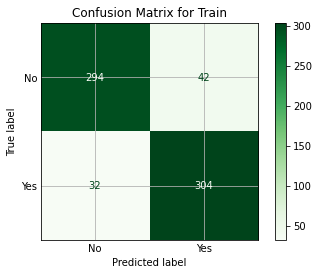

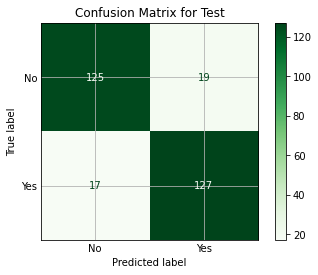

In [40]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train_scaled_df,y_train)

scores_Sklearn = get_metrics_score(clf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

## MLP CLASSIFIER

Model performance
Accuracy : Train:  0.981  Test:  0.969
Recall   : Train:  0.979  Test:  0.979
Precision: Train:  0.982  Test:  0.959
F1       : Train:  0.981  Test:  0.969
ROC.     : Train:  0.981  Test:  0.969


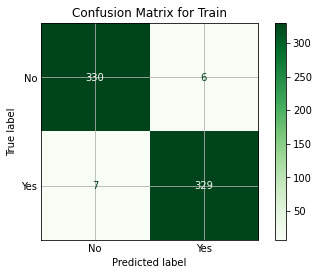

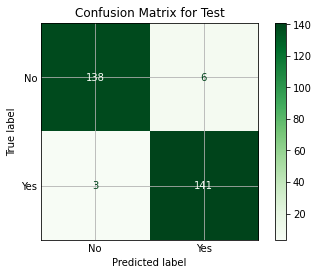

In [41]:
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled_df,y_train)

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(MLPclf,X_train_scaled_df,X_test_scaled_df,y_train,y_test)
